In [1]:
# Load the basic libraries for Data Analysis.

import numpy as np 
import pandas as pd

## Checkpoint 1
#### Importing the companies.txt file and make it a dataframe.

In [2]:
companies = pd.read_csv("companies.txt", sep= "\t", encoding = "ISO-8859-1")
companies.head(3)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN


In [3]:
# Getting basic information about the companies dataframe.
companies.info()
print(companies.columns)
print(companies.index)
companies.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB
Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')
RangeIndex(start=0, stop=66368, step=1)


(66368, 10)

In [4]:
# Get some other basic details of dataframe.
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Dreamfund-Holdings,Karma,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


#### Importing the rounds2.csv file as round dataframe.


In [5]:
round = pd.read_csv("rounds2.csv",encoding = "ISO-8859-1")
round.head(3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0


In [6]:
round.info()
print(round.index)
print(round.columns)
round.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB
RangeIndex(start=0, stop=114949, step=1)
Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')


(114949, 6)

In [7]:
round.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


Dataframe companies & round is imported and **Table 1.1** is solved below.

In [8]:
# Q.1 How many unique companies are present in rounds2?
round.company_permalink = round.company_permalink.str.lower()

# There is issue with encoding which is corrected below. Which was encountered while solving the Q 1.1.4
round['company_permalink'] = round['company_permalink'].str.encode('ISO-8859-1').str.decode('ascii','ignore')
round.company_permalink.nunique()

# Answer: this shows that total of 66368 unique companies are present in the rounds2.csv.

66368

In [9]:
# Q.2 How many unique companies are present in the companies file?
companies['permalink'] = companies['permalink'].str.lower()
companies['permalink'].nunique()
# Ans. Shows that a total of 66368 unique companies are present in the companies.txt database.

66368

In [10]:
# Q.3 In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.
print(len(companies))
print(companies.permalink.nunique())
#Ans. This shown that all the entries in 'Permalink' are unique so it can be used as unique key.

66368
66368


In [11]:
#Q.4 Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.

companies[~companies['permalink'].isin(round['company_permalink'])]

#running this code shows that there was some issue with decoding the file because special characters are present.
# we will have to remove these inconsistency before finding above answer.



,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
43,/organization/10â°north,10Â°North,NaN,Fashion,operating,CAN,ON,Toronto,Mississauga,05-01-2013
426,/organization/51wofang-æ å¿§ææ¿,51wofang æ å¿§ææ¿,http://www.51wofang.com,NaN,closed,NaN,NaN,NaN,NaN,01-01-2014
1506,/organization/adslinkedâ¢,AdsLinkedâ¢,http://www.adslinked.com,Advertising|Internet,operating,NaN,NaN,NaN,NaN,NaN
1775,/organization/aesthetic-everythingâ®-social-ne...,Aesthetic EverythingÂ® Social Network,http://aestheticeverything.com/,Public Relations,operating,USA,CA,Los Angeles,Marina Del Rey,15-06-2009
1834,/organization/affluent-attachã©-club-2,Affluent AttachÃ© Club,http://www.affluentattache.com/,Hospitality,operating,USA,CA,Los Angeles,Beverly Hills,NaN
2556,/organization/allgã¤u-outlet,AllgÃ¤u Outlet,http://allgaeuoutlet.de/,Fashion,operating,DEU,2,DEU - Other,Sonthofen,NaN
4567,/organization/asiansbookâ¢,Asiansbookâ¢,http://www.asiansbook.com,Social Media|Social Network Media,operating,NaN,NaN,NaN,NaN,NaN
4903,/organization/atã¶lye-gri,AtÃ¶lye Gri,http://www.atolyegri.com/,Advertising,operating,NaN,NaN,NaN,NaN,NaN
5490,/organization/axã¨gaz,AxÃ¨gaz,http://www.axegaz.com/,Energy,operating,FRA,A8,Paris,Levallois-perret,01-01-2012
8131,/organization/borã©al-bikes-incorporated,BorÃ©al Bikes Incorporated,http://www.borealbikes.com,Automotive|Design|Manufacturing,operating,DEU,16,Berlin,Berlin,01-01-2014


In [12]:
# round dataframe encoding corrected in Q.1

# companies dataframe have special characters permalink & name so encoding corrected for these columns.
companies['permalink'] = companies['permalink'].str.encode('ISO-8859-1').str.decode('ascii','ignore')
companies['name'] = companies['name'].str.encode('ISO-8859-1').str.decode('ascii','ignore')
companies[~companies['permalink'].isin(round['company_permalink'])]

# After running the above code, It is clear that the now there is no problem in both dataframes and
# Also, there are NO companies in the rounds2 file which are not  present in companies.
# As the result of above code returns an empty dataframe.

# Ans. NO.

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [13]:
seta = set(round['company_permalink'])
type(seta)
setb = set(companies['permalink'])
type(setb)
setc = seta.difference(setb)
print(setc)
len(setc)
# verified the above result, there are NO companies in the rounds2 file which are not  present in companies.

set()


0

In [14]:
# Q.5 How many observations are present in master_frame ?

master_frame = pd.merge(companies, round, how = 'inner', left_on = 'permalink', right_on = 'company_permalink')
master_frame.info()

# Ans. A total of 114949 entries are present in the master_frame dataframe.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
permalink                  114949 non-null object
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


## Checkpoint 2: Funding Type Analysis
#### Before finding the answers of Question in Table 2.1, we will have to clean up the data of redundant and null values.

In [15]:
# company_permalink removed as its redundant
master_frame.drop(columns = 'company_permalink', inplace = True)
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
permalink                  114949 non-null object
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(14)
memory usage: 14.0+ MB


In [16]:
# Adding all the NULL values column wise and looking it as % of total values.

(master_frame.isnull().sum()/len(master_frame.index))*100

permalink                   0.000000
name                        0.000870
homepage_url                5.336280
category_list               2.966533
status                      0.000000
country_code                7.549435
state_code                  9.522484
region                      8.844792
city                        8.842182
founded_at                 17.852265
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.909725
funded_at                   0.000000
raised_amount_usd          17.390321
dtype: float64

In [17]:
# Unnecessary columns with high % of NULL Values and column with no contribution to our study can be dropped.
# Columns funding_round_code 72.9% , homepage_url 5.33% , founded_at 17.85% NULL values can be dropped.

master_frame.drop(columns = ['funding_round_code','founded_at','homepage_url'], inplace = True)
master_frame.info()
# Total 12 columns left now.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 12 columns):
permalink                  114949 non-null object
name                       114948 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(11)
memory usage: 11.4+ MB


In [18]:
# % of NULL Values in dataframe, columnwise
(master_frame.isnull().sum()/len(master_frame.index))*100

permalink                   0.000000
name                        0.000870
category_list               2.966533
status                      0.000000
country_code                7.549435
state_code                  9.522484
region                      8.844792
city                        8.842182
funding_round_permalink     0.000000
funding_round_type          0.000000
funded_at                   0.000000
raised_amount_usd          17.390321
dtype: float64

#### Here, it can be seen that **raised_amout_usd** is having 17.4% NULL Values but it can't be deleted as it is our main source for Analysis. other columns of significant importance are category list, country_code & funding_round_type.

#### Now we should delete the rows with NULL values specially where we don't have investement, country and category. Before that we will look for % of rows having more than 5 missing values.


In [19]:
# counting the no. of rows having > 5 missing values.
print(len(master_frame[master_frame.isnull().sum(axis=1) > 5].index))
# 1206 have more than 5 missing values
print((len(master_frame[master_frame.isnull().sum(axis = 1) > 5].index)/len(master_frame.index))*100)
# this shows that merely 1% rows are having more that 5 NaN values. so we will not remove it.

1206
1.049160932239515


Now, we will delete the rows having null values in **column investement, country and category**.

In [20]:
# Deleted rows having NaN values in investment column (i.e. raised_amount_usd).
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]
(master_frame.isnull().sum()/len(master_frame.index))*100


permalink                  0.000000
name                       0.001053
category_list              1.099422
status                     0.000000
country_code               6.161607
state_code                 8.007666
region                     7.422151
city                       7.418991
funding_round_permalink    0.000000
funding_round_type         0.000000
funded_at                  0.000000
raised_amount_usd          0.000000
dtype: float64

In [21]:
# Deleted rows having NaN values in country (i.e. country_code).
master_frame = master_frame[~pd.isnull(master_frame['country_code'])]

# Proportion of missing values.
(master_frame.isnull().sum()/len(master_frame.index)*100)


permalink                  0.000000
name                       0.001122
category_list              0.649773
status                     0.000000
country_code               0.000000
state_code                 1.967276
region                     1.343314
city                       1.339947
funding_round_permalink    0.000000
funding_round_type         0.000000
funded_at                  0.000000
raised_amount_usd          0.000000
dtype: float64

In [22]:
# Deleted rows having NaN values in category (i.e. category_list).
master_frame = master_frame[~pd.isnull(master_frame['category_list'])]

# Proportion of missing values.
master_frame.isnull().sum()/len(master_frame.index)*100

permalink                  0.000000
name                       0.001130
category_list              0.000000
status                     0.000000
country_code               0.000000
state_code                 1.955291
region                     1.337415
city                       1.334026
funding_round_permalink    0.000000
funding_round_type         0.000000
funded_at                  0.000000
raised_amount_usd          0.000000
dtype: float64

In [23]:
# Dropped the columns state_code, region and city beucause they are having NaN values and of no use for us in Analysis.
master_frame.drop(columns = ['state_code','region','city'], inplace = True)

# Proportion of missing values.
master_frame.isnull().sum()/len(master_frame.index)*100

permalink                  0.00000
name                       0.00113
category_list              0.00000
status                     0.00000
country_code               0.00000
funding_round_permalink    0.00000
funding_round_type         0.00000
funded_at                  0.00000
raised_amount_usd          0.00000
dtype: float64

In [24]:
# Now we have cleaned the data to required level for doing our analysis. 
# A glance at the data now.
# We can proceed to the do analysis.
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88529 entries, 0 to 114947
Data columns (total 9 columns):
permalink                  88529 non-null object
name                       88528 non-null object
category_list              88529 non-null object
status                     88529 non-null object
country_code               88529 non-null object
funding_round_permalink    88529 non-null object
funding_round_type         88529 non-null object
funded_at                  88529 non-null object
raised_amount_usd          88529 non-null float64
dtypes: float64(1), object(8)
memory usage: 6.8+ MB


#### Spark Funds wants to choose one of the funding type from Venture, angel, seed and private equity.

In [25]:
# Now to find average funding amount of Venture type, angel type, seed type & private equity type.
# We need to extract new dataframe from master_dataframe.

funding = master_frame[(master_frame['funding_round_type'] == 'venture') |
                        (master_frame['funding_round_type'] == 'angel') |
                        (master_frame['funding_round_type'] == 'seed') |
                        (master_frame['funding_round_type'] == 'private_equity')]
funding.head(3)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [26]:
funding.groupby('funding_round_type').mean()

,raised_amount_usd
funding_round_type,
angel,9.715739e+05
private_equity,7.393849e+07
seed,7.477937e+05
venture,1.172422e+07


In [27]:
# Values are not readable so convert raised_amount_usd to Million.
funding['raised_amount_usd'] = funding['raised_amount_usd']/1000000

# Separate Dataframe for plotting funding_plot created. Used in Checklist 6.
funding_plot = funding

C:\Users\Shailendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
funding.pivot_table(values = 'raised_amount_usd', index = 'funding_round_type', aggfunc = ['mean', 'median', lambda x:x.mode()])

,mean,median,<lambda>
,raised_amount_usd,raised_amount_usd,raised_amount_usd
funding_round_type,,,
angel,0.971574,0.414906,0.5
private_equity,73.938486,20.000000,100.0
seed,0.747794,0.300000,1.0
venture,11.724223,5.000000,10.0


#### From the above pivot_table, we can clearly note the following points:
1. Mean of only VENTURE type is in our required range i.e **5-15 Million USD.**
2. Median also shows that funding category (angel, private_equity and seed) sample distribution lies mostly on one side of our required range. For Venture fund idealy it should lie near 10 Million USD but still 5 Million USD is better that other 3.
3. Mode data shows that venture type has maximum instances of 10 Million USD, which is is our preferred range of investment. For others investment type Mode is not following our range requirement.

### With all the above evidence, we can confidently conclude that the venture type investment is best suitable for Spark Funds.


## Checkpoints 3: Country Analysis

In [29]:
# dataframe funding can be purged of other funding_round_type as now onwards, the requirement will be for VENTURE type only.
funding = funding[funding['funding_round_type'] == 'venture']
funding.head(3)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000000
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,0.719491


In [30]:
top9 = funding.pivot_table(values = 'raised_amount_usd', index = 'country_code', aggfunc = 'sum').sort_values('raised_amount_usd', ascending = False)
top9 = top9.iloc[:9]


# Separate Dataframe for plotting created. Used in Checklist 6.
top9_plot = pd.DataFrame(top9)
top9_plot

# Below pivot table shows the top 9 countries with highest total funding across Venture investment type.

,raised_amount_usd
country_code,
USA,420068.029342
CHN,39338.918773
GBR,20072.813004
IND,14261.508718
CAN,9482.217668
FRA,7226.851352
ISR,6854.350477
DEU,6306.921981
JPN,3167.647127


#### Top 3 English speaking countries based on Venture investment type are USA,GBR & IND.
From Now onwards, we can narrow down on These 3 countries i.e. USA, GBR & IND.


## Checkpoint 4: Sector Analysis 1

In [31]:
# Now, We remove the data of countries other that our required ones.
funding = funding[(funding['country_code'] == 'USA') | (funding['country_code'] == 'GBR') | (funding['country_code'] == 'IND')]
funding.head(3)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.0
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.0
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.7


In [32]:
# Now first part of the category list before | is the primary sector. Splitting category list at '|'.
funding['category_list'] = funding['category_list'].str.split('|').str[0]

# All enteries lowercased as we need to merge the data on this column later.
funding['category_list'] = funding['category_list'].str.lower()

funding.head(3)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.0
10,/organization/0xdata,H2O.ai,analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.0
11,/organization/0xdata,H2O.ai,analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.7


In [33]:
# import mapping file
mapping = pd.read_csv("mapping.csv")
mapping.head(3)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0


In [34]:
# pivot table conveted to single column using melt command.
mapping_melt = pd.melt(mapping, id_vars = 'category_list', var_name = 'main_sector')

# Rows with value = 1 extracted.
mapping_melt = mapping_melt[mapping_melt['value'] == 1]

# Drop the value column as it is not required anymore.
mapping_melt.drop(columns = 'value', inplace = True)

# Entries lowercased as merging will be done on this.
mapping_melt['category_list'] = mapping_melt['category_list'].str.lower()
mapping_melt.head(3)

,category_list,main_sector
8,adventure travel,Automotive & Sports
14,aerospace,Automotive & Sports
45,auto,Automotive & Sports


In [35]:
# Info about the dataframe. It shows there is a null value in category_list.
mapping_melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 8 to 6167
Data columns (total 2 columns):
category_list    687 non-null object
main_sector      688 non-null object
dtypes: object(2)
memory usage: 16.1+ KB


In [36]:
# Drop the row in category_list having null value.
mapping_melt.dropna(inplace = True, subset= ['category_list'])

# check the info of dataframe.
mapping_melt.info()

# Now, the dataframe has no null values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 8 to 6167
Data columns (total 2 columns):
category_list    687 non-null object
main_sector      687 non-null object
dtypes: object(2)
memory usage: 16.1+ KB


In [37]:
# There was a issue observed that category list is having 0 is place of na in spelling.
mapping_melt.sort_values(by = 'category_list', ascending = True).head(5)

# This can be easily observed in the below dataframe.

,category_list,main_sector
1847,0notechnology,Cleantech / Semiconductors
1848,0tural language processing,Cleantech / Semiconductors
1849,0tural resources,Cleantech / Semiconductors
4602,0vigation,"News, Search and Messaging"
3441,3d,Manufacturing


In [38]:
# 0 is replaced with na in the spellings of category_list.
mapping_melt['category_list'] = mapping_melt['category_list'].str.replace('0','na')

# Check if operation was successful.
mapping_melt[mapping_melt['category_list'].str.contains('0')]

# It clear that all the spellings are corrected as the result of above code is emply dataframe.


,category_list,main_sector


In [39]:
mapping_melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 8 to 6167
Data columns (total 2 columns):
category_list    687 non-null object
main_sector      687 non-null object
dtypes: object(2)
memory usage: 16.1+ KB


In [40]:
# Dataframe 'Sector' and 'Mapping_melt' merged together to get a combined dataframe with main_sector as column.
sector = funding.merge(mapping_melt, how = 'left', on = 'category_list')

sector.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 38802
Data columns (total 10 columns):
permalink                  38803 non-null object
name                       38803 non-null object
category_list              38803 non-null object
status                     38803 non-null object
country_code               38803 non-null object
funding_round_permalink    38803 non-null object
funding_round_type         38803 non-null object
funded_at                  38803 non-null object
raised_amount_usd          38803 non-null float64
main_sector                38788 non-null object
dtypes: float64(1), object(9)
memory usage: 3.3+ MB


In [41]:
# There are 15 rows which are having no values in the main_sector.
sector[sector['main_sector'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 7345 to 35906
Data columns (total 10 columns):
permalink                  15 non-null object
name                       15 non-null object
category_list              15 non-null object
status                     15 non-null object
country_code               15 non-null object
funding_round_permalink    15 non-null object
funding_round_type         15 non-null object
funded_at                  15 non-null object
raised_amount_usd          15 non-null float64
main_sector                0 non-null object
dtypes: float64(1), object(9)
memory usage: 1.3+ KB


In [42]:
# Where no values are there for main_sector, It is suggested to imputed with 'Others' as it can be treated as Other sector.
sector['main_sector'].fillna('Others', inplace = True)
sector.info()
# Now it is clearly visible that there is no null value.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 38802
Data columns (total 10 columns):
permalink                  38803 non-null object
name                       38803 non-null object
category_list              38803 non-null object
status                     38803 non-null object
country_code               38803 non-null object
funding_round_permalink    38803 non-null object
funding_round_type         38803 non-null object
funded_at                  38803 non-null object
raised_amount_usd          38803 non-null float64
main_sector                38803 non-null object
dtypes: float64(1), object(9)
memory usage: 3.3+ MB


## Checkpoint 5: Sector Analysis 2

In [43]:
# Glance at Dataframe
sector.head(3)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector
0,/organization/-fame,#fame,media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.0,Entertainment
1,/organization/0xdata,H2O.ai,analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.0,"Social, Finance, Analytics, Advertising"
2,/organization/0xdata,H2O.ai,analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.7,"Social, Finance, Analytics, Advertising"


In [44]:
# Preferred range of funding by Spark Funds is 5 to 15 million USD.
sector = sector[(sector['raised_amount_usd'] >= 5) & (sector['raised_amount_usd'] <= 15)]

# Separate Dataframe created for plotting to be done in Checkpoint 6.
sector_plot = sector

sector.head(3)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector
0,/organization/-fame,#fame,media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.0,Entertainment
3,/organization/0xdata,H2O.ai,analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.9,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,1 Mainstream,apps,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5.0,"News, Search and Messaging"


In [45]:
# It is already found that USA, GBR & IND are highly invested countries.
# Seperate dataframe will be created for further analysis.
# Create Groupby object with 'country_code'.
country_code_groupby = sector.groupby('country_code')

# creating D1 dataframe English speaking country i.e. USA.
D1 = country_code_groupby.get_group('USA')
D1.head(3)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector
3,/organization/0xdata,H2O.ai,analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.900000,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,1 Mainstream,apps,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5.000000,"News, Search and Messaging"
17,/organization/128-technology,128 Technology,service providers,operating,USA,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11.999347,Others


In [46]:
# creating D2 dataframe English speaking country i.e. GBR. 
D2 = country_code_groupby.get_group('GBR')
D2.head(3)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector
108,/organization/365scores,365Scores,android,operating,GBR,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,5.500000,"Social, Finance, Analytics, Advertising"
232,/organization/7digital,7digital,content creators,acquired,GBR,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,01-01-2008,8.468328,Entertainment
233,/organization/7digital,7digital,content creators,acquired,GBR,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,19-10-2012,10.000000,Entertainment


In [47]:
# creating D3 dataframe English speaking country i.e. IND.
D3 = country_code_groupby.get_group('IND')
D3.head(3)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector
0,/organization/-fame,#fame,media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000,Entertainment
55,/organization/21diamonds-india,21Diamonds,e-commerce,operating,IND,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6.369507,Others
276,/organization/a-little-world,A LITTLE WORLD,finance,operating,IND,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,09-09-2008,6.410000,"Social, Finance, Analytics, Advertising"


#### Solution for the question in Table 5.1

In [48]:
# for D1 Total no. of investment & Total amount of investment.
D1['raised_amount_usd'].agg(['count','sum'])

count     12064.000000
sum      107766.584223
Name: raised_amount_usd, dtype: float64

In [49]:
D1.groupby('main_sector')['raised_amount_usd'].agg(['count','sum']).sort_values(by = ['count'], ascending = False)
# From this we can get most of required details for country 1 Table 5.1

,count,sum
main_sector,,
Others,2951,26330.493931
"Social, Finance, Analytics, Advertising",2714,23807.376964
Cleantech / Semiconductors,2350,21633.430822
"News, Search and Messaging",1583,13971.567428
Health,909,8211.859357
Manufacturing,799,7258.553378
Entertainment,591,5099.197982
Automotive & Sports,167,1454.104361


In [50]:
D1_top_sector = D1[D1['main_sector'] == 'Others']
D1_top_sector = D1_top_sector.pivot_table(values = 'raised_amount_usd', index = 'permalink', aggfunc = 'sum').sort_values(by = 'raised_amount_usd',ascending = False)
print(D1_top_sector.head(1))

D1_second_best = D1[D1['main_sector'] == 'Social, Finance, Analytics, Advertising']
D1_second_best = D1_second_best.pivot_table(values = 'raised_amount_usd', index = 'permalink', aggfunc = 'sum').sort_values(by = 'raised_amount_usd',ascending = False)
print(D1_second_best.head(1))

# For country 1
# Top sector highest invested company is Virtustream.
# Second best sector highest invested company is shotspotter.

                           raised_amount_usd
permalink                                   
/organization/virtustream               64.3
                           raised_amount_usd
permalink                                   
/organization/shotspotter          67.933006


In [51]:
# for D2 Total no. of investment & Total amount of investment.
D2['raised_amount_usd'].agg(['count','sum'])

count     621.000000
sum      5379.078691
Name: raised_amount_usd, dtype: float64

In [52]:
D2.groupby('main_sector')['raised_amount_usd'].agg(['count','sum']).sort_values(by = 'count', ascending = False)
# From this we can get most of required details for country 2 Table 5.1.

,count,sum
main_sector,,
Others,147,1283.624289
"Social, Finance, Analytics, Advertising",133,1089.404014
Cleantech / Semiconductors,130,1163.990056
"News, Search and Messaging",73,615.746235
Entertainment,56,482.784687
Manufacturing,42,361.940335
Health,24,214.537510
Automotive & Sports,16,167.051565


In [53]:
D2_top_sector = D2[D2['main_sector'] == 'Others']
D2_top_sector = D2_top_sector.pivot_table(values = 'raised_amount_usd', index = 'permalink', aggfunc = 'sum').sort_values(by = 'raised_amount_usd',ascending = False)
print(D2_top_sector.head(1))

D2_second_best = D2[D2['main_sector'] == 'Social, Finance, Analytics, Advertising']
D2_second_best = D2_second_best.pivot_table(values = 'raised_amount_usd', index = 'permalink', aggfunc = 'sum').sort_values(by = 'raised_amount_usd',ascending = False)
print(D2_second_best.head(1))

# For country 2
# Top sector highest invested company is Electric Cloud.
# Second best sector highest invested company is Celltick Technologies.


                              raised_amount_usd
permalink                                      
/organization/electric-cloud               37.0
                                     raised_amount_usd
permalink                                             
/organization/celltick-technologies               37.5


In [54]:
# for D3 Total no. of investment & Total amount of investment.
D3['raised_amount_usd'].agg(['count','sum'])

count     328.000000
sum      2949.543602
Name: raised_amount_usd, dtype: float64

In [55]:
D3.groupby('main_sector')['raised_amount_usd'].agg(['count','sum']).sort_values(by = 'count', ascending = False)
# From this we can get most of required details for country 3 Table 5.1.

,count,sum
main_sector,,
Others,110,1013.409507
"Social, Finance, Analytics, Advertising",60,550.549550
"News, Search and Messaging",52,433.834545
Entertainment,33,280.830000
Manufacturing,21,200.900000
Cleantech / Semiconductors,20,165.380000
Health,19,167.740000
Automotive & Sports,13,136.900000


In [56]:
D3_top_sector = D3[D3['main_sector'] == 'Others']
D3_top_sector = D3_top_sector.pivot_table(values = 'raised_amount_usd', index = 'permalink', aggfunc = 'sum').sort_values(by = 'raised_amount_usd',ascending = False)
print(D3_top_sector.head(1))

D3_second_best = D3[D3['main_sector'] == 'Social, Finance, Analytics, Advertising']
D3_second_best = D3_second_best.pivot_table(values = 'raised_amount_usd', index = 'permalink', aggfunc = 'sum').sort_values(by = 'raised_amount_usd',ascending = False)
print(D3_second_best.head(1))

# For country 3
# Top sector highest invested company is Firstcry.com.
# Second best sector highest invested company is Manthan systems.

                            raised_amount_usd
permalink                                    
/organization/firstcry-com               39.0
                               raised_amount_usd
permalink                                       
/organization/manthan-systems               50.7


## Checkpoint 6: Plots

In [57]:
# Import the plotting libraries.

import matplotlib.pyplot as plt
import seaborn as sns


# set the plotting style.
sns.set_style("whitegrid")

In [58]:
# Added new column fraction of raised amount against total investment to plot the graph required in 1.
funding_plot['fraction_raised_amount_usd'] = 100*(funding_plot['raised_amount_usd']/715141.0404700001)
funding_plot.groupby('funding_round_type')['raised_amount_usd', 'fraction_raised_amount_usd'].agg(['count','sum'])

C:\Users\Shailendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


raised_amount_usd                 \
                               count            sum   
funding_round_type                                    
angel                           4400    4274.925121   
private_equity                  1820  134568.045021   
seed                           21095   15774.707732   
venture                        47809  560523.362596   

                   fraction_raised_amount_usd             
                                        count        sum  
funding_round_type                                        
angel                                    4400   0.597774  
private_equity                           1820  18.816994  
seed                                    21095   2.205818  
venture                                 47809  78.379415

C:\Users\Shailendra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

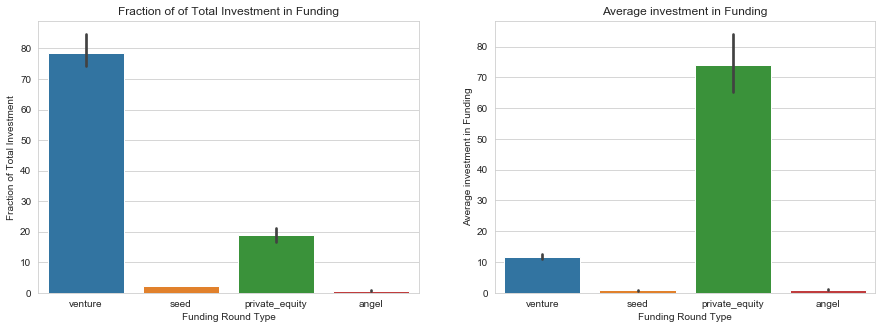

In [59]:
# 1 subplot shows the fraction of total investments in different funding types.
plt.figure(1)
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.title('Fraction of of Total Investment in Funding')
sns.barplot(x= 'funding_round_type', y ='fraction_raised_amount_usd', data = funding_plot, estimator = np.sum)
plt.ylabel('Fraction of Total Investment')
plt.xlabel('Funding Round Type')

# 2nd Subplot shows the average amount of investment in each funding type.
plt.subplot(122)
plt.title('Average investment in Funding')
sns.barplot(x = 'funding_round_type', y = 'raised_amount_usd', data = funding_plot, estimator = np.mean)
plt.ylabel('Average investment in Funding')
plt.xlabel('Funding Round Type')

# plot the figure.
plt.show()

### Plot 1
   
   - From subplot 1 : It is visible that major portion of total investment is in the Venture funding type.
   - From subplot 2 : It is visible that only in the venture funding type the average amount of investment is 5-15 Million USD.      which is our preferred range.
   - From the above plots and reasoning, it is very clear that Venture type investment is most suitable.
   

In [60]:
# 2. Plot : Dataframe for the plot showing total investment of top 9 countries in Venture Funding type.
top9_plot = top9_plot.reset_index()
top9_plot

,country_code,raised_amount_usd
0,USA,420068.029342
1,CHN,39338.918773
2,GBR,20072.813004
3,IND,14261.508718
4,CAN,9482.217668
5,FRA,7226.851352
6,ISR,6854.350477
7,DEU,6306.921981
8,JPN,3167.647127


<Figure size 432x288 with 0 Axes>

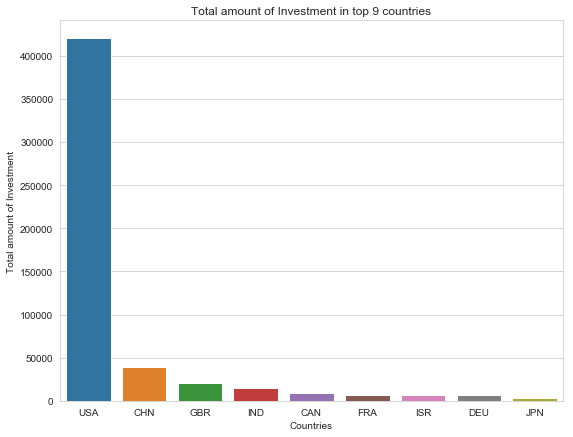

In [61]:
# 2nd Plot
plt.figure(2)
plt.figure(figsize = (9,7))
sns.barplot(x = 'country_code', y= 'raised_amount_usd', data = top9_plot, estimator = np.sum)
plt.title('Total amount of Investment in top 9 countries')
plt.ylabel('Total amount of Investment')
plt.xlabel('Countries')

plt.show()

### Plot 2:
   - From the above plot it is clear that 'USA','CHN', 'GBR','IND'  received the highest total amount of investment in Venture      Funding type.
   - Now, we want to invest only in english speaking countries, so we decided to go with 'USA', 'GBR' & 'IND'.

In [62]:
# 3rd Plot
sector_plot.head(3)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector
0,/organization/-fame,#fame,media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.0,Entertainment
3,/organization/0xdata,H2O.ai,analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.9,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,1 Mainstream,apps,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5.0,"News, Search and Messaging"


<Figure size 432x288 with 0 Axes>

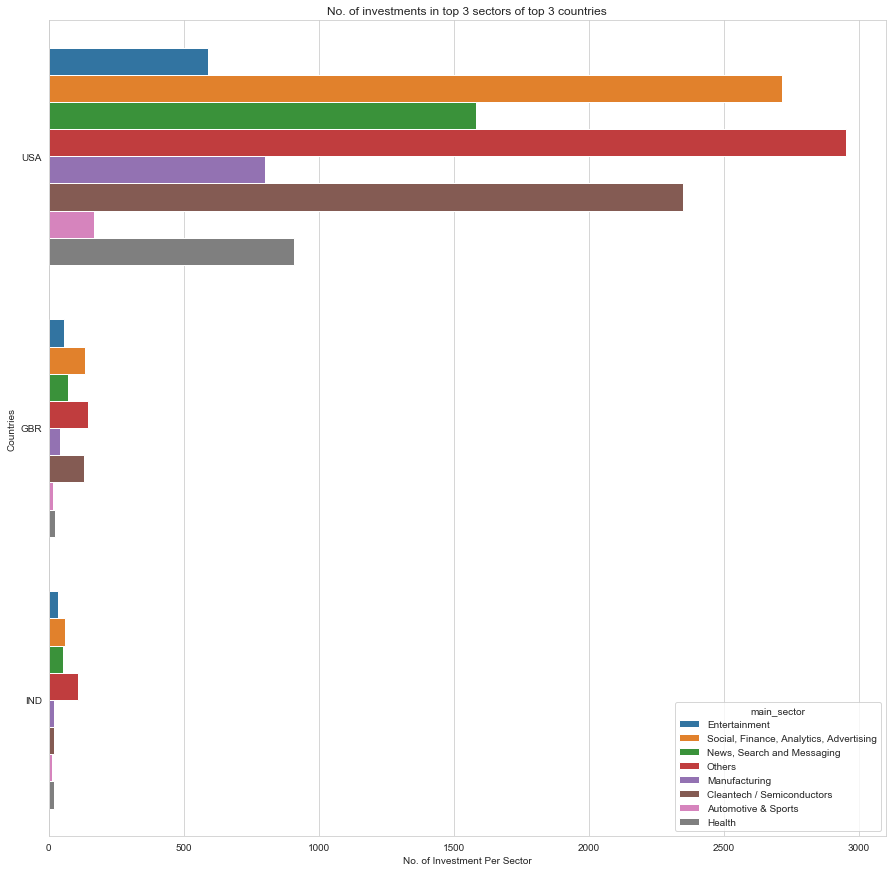

In [63]:
plt.figure(3)
plt.figure(figsize = (15,15))
sns.countplot(y = 'country_code', hue = 'main_sector', data = sector_plot, order = ['USA','GBR','IND'])
plt.title('No. of investments in top 3 sectors of top 3 countries')
plt.ylabel('Countries')
plt.xlabel('No. of Investment Per Sector')

plt.show()

### Plot 3
- From the plot, we can conclude that - 
    - For 'USA' top three sectors are:
            1) Others
            2) Social, Finance, Analytics, Advertising	
            3) Cleantech / Semiconductors
    - For 'GBR' top three sectors are:
            1) Others	
            2) Social, Finance, Analytics, Advertising	
            3) Cleantech / Semiconductors
    - For 'IND' top three sectors are:
            1) Others	
            2) Social, Finance, Analytics, Advertising	
            3) News, Search and Messaging	

# Conclusion:

## From our study we can conclude that for Spark Funds:
### Venture type investment is best suited and investment should be done in following 3 countries in 3 main sectors.
- For 'USA' top three sectors are:
            1) Others
            2) Social, Finance, Analytics, Advertising	
            3) Cleantech / Semiconductors
    - For 'GBR' top three sectors are:
            1) Others	
            2) Social, Finance, Analytics, Advertising	
            3) Cleantech / Semiconductors
    - For 'IND' top three sectors are:
            1) Others	
            2) Social, Finance, Analytics, Advertising	
            3) News, Search and Messaging	

# Finish